In [31]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import numpy as np
import pickle

In [32]:
df = pd.read_csv('~/my_proj/data/all_data.csv')

In [33]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [34]:
df['Subscription Type'] = df['Subscription Type'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Device'] = df['Device'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Age'] = df['Age'].astype('int8')

In [35]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User ID            2500 non-null   int64   
 1   Subscription Type  2500 non-null   category
 2   Monthly Revenue    2500 non-null   int64   
 3   Join Date          2500 non-null   object  
 4   Last Payment Date  2500 non-null   object  
 5   Country            2500 non-null   category
 6   Age                2500 non-null   int8    
 7   Gender             2500 non-null   category
 8   Device             2500 non-null   category
 9   Plan Duration      2500 non-null   object  
dtypes: category(4), int64(2), int8(1), object(3)
memory usage: 110.8+ KB


In [36]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [37]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Subscription Type', 'Country', 'Gender', 'Device']

In [38]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['User ID', 'Monthly Revenue', 'Age']

In [39]:
for col in df.columns:
    print(col)
    print(len(df[col].unique()))

User ID
2500
Subscription Type
3
Monthly Revenue
6
Join Date
300
Last Payment Date
26
Country
10
Age
26
Gender
2
Device
4
Plan Duration
1


In [40]:
df = df.drop(columns=['Plan Duration', "User ID"])

In [41]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Subscription Type  2500 non-null   category
 1   Monthly Revenue    2500 non-null   int64   
 2   Join Date          2500 non-null   object  
 3   Last Payment Date  2500 non-null   object  
 4   Country            2500 non-null   category
 5   Age                2500 non-null   int8    
 6   Gender             2500 non-null   category
 7   Device             2500 non-null   category
dtypes: category(4), int64(1), int8(1), object(2)
memory usage: 71.7+ KB


In [42]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Subscription Type - numer of unique = 3
Country - numer of unique = 10
Gender - numer of unique = 2
Device - numer of unique = 4


In [43]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Subscription Type: Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64
Unique categories in Country: Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: count, dtype: int64
Unique categories in Gender: Gender
Female    1257
Male      1243
Name: count, dtype: int64
Unique categories in Device: Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


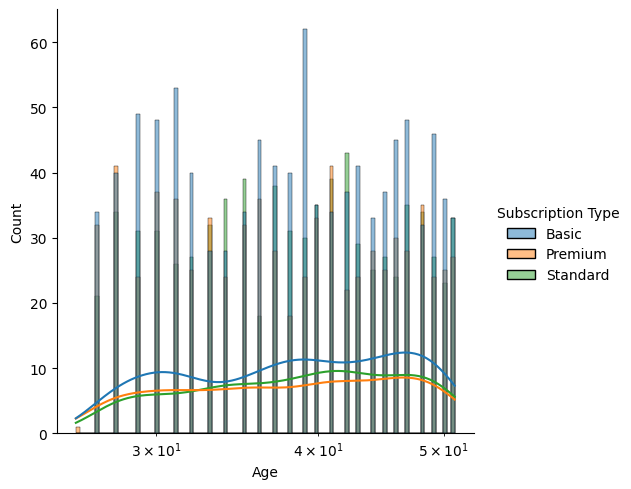

In [46]:
sns.displot(df, x='Age', bins=100, hue='Subscription Type', kde=True, log_scale=True)

In [ ]:
df['floor_level'] = df.apply(lambda x: 'low' if x['level']/x['levels'] <= 0.3 \     
                                else 'hi' if x['level']/x['levels'] > 0.7 \
                                else 'mid', axis = 1) 